# <center> Numpy Tutorial </center>

</br>
<code>Numpy</code> is a python library dedicated for working with multi-dimentional arrays. On this exercise, you are warming up with <code>Numpy</code>, especially with multi-dimentional arrays and how to vectorize your deep learning algorithm. Many methods from Deep Learning (DL) frameworks like <code>TensorFlow</code> or <code>Pytorch</code> work in the similar way to <code>Numpy</code> methods, so being familiar with <code>Numpy</code> brings you great advantages. Furthermore, some parts/modules/phases of your NN applications/projects would use <code>Numpy</code> rather than the DL frameworks. Often, <code>Numpy</code> and DL codes are mixed in your implementation and you need to know when to use <code>Numpy</code> and when to use your DL frameworks.   

</br> </br>
You will learn to: </br>
*  Work with __multi-dimentional arrays__
*  Understand what is __broadcasting__ and how to make use of it (and how to avoid unwanted broadcasting)
*  Use `random` package
*  Do __vectorization__



First, let's import `Numpy` and explore some basic methods: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

I assume that you are familiar with some basic numpy methods, or at least know how to look them up on the internet. Now we will focus on linear algebra.
# 1. Multi-dimentional Arrays

In [2]:
a = np.array([3, 2])
print("An array:")
print(a)
print("Shape of a: (note the weird shape)")
print(a.shape)
print("==================================")
x = np.array([[3, 2]])
print("A row vector:")
print(x)
print("Shape of x:")
print(x.shape)
print("==================================")
y = np.array([[3], [2]])
print("A column vector:")
print(y)
print("Shape of y:")
print(y.shape)

An array:
[3 2]
Shape of a: (note the weird shape)
(2,)
A row vector:
[[3 2]]
Shape of x:
(1, 2)
A column vector:
[[3]
 [2]]
Shape of y:
(2, 1)


Note the differences, while 1D arrays and vectors are mathematically similar concepts, in deep learning, we prefer to _understand vector as a matrix with either one row or one column_, not the 1D array.  

In [3]:
X = np.array([[3, 2], [-1, 3]])
print("This is a matrix")
print(X)
print("Shape of X:")
print(X.shape)

This is a matrix
[[ 3  2]
 [-1  3]]
Shape of X:
(2, 2)


Let's reshape the matrix $X$ to be a vector (or sometimes we call it __flattening__: making a multi-dimensional array becomes a vector):

In [4]:
print(X.reshape(1,4))
print(X.reshape(1,-1)) # Notice the -1

[[ 3  2 -1  3]]
[[ 3  2 -1  3]]


__Notes__:
  1. At this time we work with vectors and matrices, so at the moment, you can think about printing out those to see them and understanding them as rows and columns __only for now__. Soon, however, we will work with multi-dimensional $n$-dim arrays ($n \geq 3$), so do not heavily rely on your intuitions in the 2D or 3D space.
  2. In deep learning/machine learning, any vector should not be understood as a vector in a __geometric__ world but it is a __physical__ vector, i.e. a specific state of some attributes of an object, or an ordered list of attribute values in the __computer science__ world. For example, [2, 3, 100, 30000] is a vector denoting a house's attributes: it has 2 bathrooms, 3 bedrooms, its area is 100 squared meters and it costs 30000 EUR. And this understanding should be expanded to the more general multi-dimensional arrays. Another example: the 2D array, or matrix above, [[3, 2], [-1, 3]], might denote the grayscale values of a $2 \times 2$-pixel image, but it might denote the weight matrix between a 2-neuron layer and another 2-neuron layer in a deep neural network, so again, _do not heavily rely on your intuitions in the 2D or 3D space_.

Let's get used to this way of thinking by doing array slicing.
  
  

## Slicing

When I started using `python`, I found slicing very useful. I have a numpy (1D) array or some python list, and I can use slicing to extract continuous elements of that array, similar but less convenient than chossing some page range to print in the PDF printing dialog:

In [5]:
a = np.arange(2,12)

In [6]:
a

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [7]:
a[3:8] # Extract a subarray from the 3rd element to (but not include) the 8th one.

array([5, 6, 7, 8, 9])

In [8]:
my_string = "Hallo"
my_substring = my_string[1:4] # instead of using some string.substring() function, if it even exists!
print(my_substring)

all


<img src="../Images/MatrixSlicing2.png" style="width:276px;height:282px">


2D arrays a.k.a matrices? No problem! First slice the rows (blue cells), then the columns in those rows (green cells):

In [9]:
a = np.array([[1, 8, -3, 0], [2, 1, -1, 5], [6, 5, 7, 1], [-2, -1, 1,4]])
print(a[1:3,1:3])

[[ 1 -1]
 [ 5  7]]


Only care about the rows (blue) or the columns (yellow)? 

In [10]:
print(a[1:3,:]) # take all the columns in the sliced rows
print(a[:,1:3]) # take all the rows in the sliced columns

[[ 2  1 -1  5]
 [ 6  5  7  1]]
[[ 8 -3]
 [ 1 -1]
 [ 5  7]
 [-1  1]]


<img src="../Images/3DMatrixSlicing.png" style="width:366px;height:360px">

3D arrays? Like an image with its width, height and RGB channels? More difficult but still manage to do. Below is to extract the Green channel (the second channel), and it becomes the matrix similar to the above matrix, and we can continue our slicing as we wish: 

In [8]:
a = np.array([[1, 8, -3, 0], [2, 1, -1, 5], [6, 5, 7, 1], [-2, -1, 1,4]])
a = np.tile(a, (3,1,1)).T
a

array([[[ 1,  1,  1],
        [ 2,  2,  2],
        [ 6,  6,  6],
        [-2, -2, -2]],

       [[ 8,  8,  8],
        [ 1,  1,  1],
        [ 5,  5,  5],
        [-1, -1, -1]],

       [[-3, -3, -3],
        [-1, -1, -1],
        [ 7,  7,  7],
        [ 1,  1,  1]],

       [[ 0,  0,  0],
        [ 5,  5,  5],
        [ 1,  1,  1],
        [ 4,  4,  4]]])

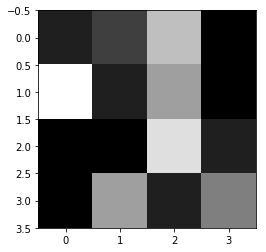

In [9]:
plt.imshow(np.maximum(a/np.max(a),0))

In [10]:
print(a[:,:,1]) # Get the green channel (every values for width and height)

[[ 1  2  6 -2]
 [ 8  1  5 -1]
 [-3 -1  7  1]
 [ 0  5  1  4]]


In [11]:
a[:,:,1] = np.zeros((4,4)) # Set the green channel to all 0s
a

array([[[ 1,  0,  1],
        [ 2,  0,  2],
        [ 6,  0,  6],
        [-2,  0, -2]],

       [[ 8,  0,  8],
        [ 1,  0,  1],
        [ 5,  0,  5],
        [-1,  0, -1]],

       [[-3,  0, -3],
        [-1,  0, -1],
        [ 7,  0,  7],
        [ 1,  0,  1]],

       [[ 0,  0,  0],
        [ 5,  0,  5],
        [ 1,  0,  1],
        [ 4,  0,  4]]])

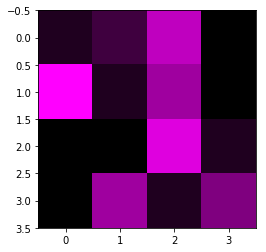

In [12]:
plt.imshow(np.maximum(a/np.max(a),0)) # red + blue = pink

Now bunch of images like that? Should be a 4-dim array, the first one is the number of images. And then extract the green channel of the $m^{th}$ image:

In [13]:
a = np.array([[1, 8, -3, 0], [2, 1, -1, 5], [6, 5, 7, 1], [-2, -1, 1,4]])
a = np.tile(a, (3,1,1)).T
a = np.tile(a, (50,1,1,1))

In [14]:
print(a[5,:,:,1]) # Get the green channel (every values for width and height) of the $5^{th}$ image

[[ 1  2  6 -2]
 [ 8  1  5 -1]
 [-3 -1  7  1]
 [ 0  5  1  4]]


You see? Don't think the first dimension as rows, or axis x, the second as column, or axis y, but just associate the dimensions with your concrete coordinate: the first one denoting a concrete image in your image set, the second one is something about width (actually the width index of a specific pixel), the last one is the different channel and so on. This way of thinking could also applied for cross-dimensional operations like the `numpy.sum()` and other aggregation operations. 

## Axes on aggregation functions

When you use $numpy.sum()$, just stop for a second and think, which thing I want to sum now, then set the axis correspondingly. For example, what if we want to sum up the pixel intensities across the channels (the last dimension)?        

In [16]:
print(np.sum(a, axis=3).shape)
np.sum(a, axis=3)

(50, 4, 4)


array([[[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15, -3],
        [-9, -3, 21,  3],
        [ 0, 15,  3, 12]],

       [[ 3,  6, 18, -6],
        [24,  3, 15,

Now what if we want to find the "average" image? We'd do the sum of pixel intensities through all the images and divide to the number of images. Since we duplicated 1 image 50 times, the average image is exactly our initial image: 

In [17]:
print((np.sum(a, axis=(0))/50).shape)
np.sum(a, axis=(0))/50

(4, 4, 3)


array([[[ 1.,  1.,  1.],
        [ 2.,  2.,  2.],
        [ 6.,  6.,  6.],
        [-2., -2., -2.]],

       [[ 8.,  8.,  8.],
        [ 1.,  1.,  1.],
        [ 5.,  5.,  5.],
        [-1., -1., -1.]],

       [[-3., -3., -3.],
        [-1., -1., -1.],
        [ 7.,  7.,  7.],
        [ 1.,  1.,  1.]],

       [[ 0.,  0.,  0.],
        [ 5.,  5.,  5.],
        [ 1.,  1.,  1.],
        [ 4.,  4.,  4.]]])

What if we want to aggregate the pixel intensities across the channels (the last dimension) and also all of the images?

In [18]:
np.sum(a, axis=(0,3))

array([[ 150,  300,  900, -300],
       [1200,  150,  750, -150],
       [-450, -150, 1050,  150],
       [   0,  750,  150,  600]])

# 2. Broadcasting

**Broadcasting** in `Numpy` refers to the implicit compatiblization when doing array arithmetics on different-shaped vectors/matrices. Of course it is a feature, not an error. If you are familiar with `Matlab/Octave`, this one is the one you feel `Matlab/Octave` are lacking of. Broadcasting makes the code more succinct and clear.

Let's go to a specific example:

In [21]:
a = np.array([[2, 1, -1, 0]]) # A row vector with the shape (1,4)
b = 2 # A scalar value
# What is a + b? Is it compatible to add a vector and a scalar?

In [22]:
c = a + b
print("a + b:")
print(c)
print(a.shape==c.shape)
brd_b = np.array([2, 2, 2, 2]) # brd_b = np.repeat(b, 4, axis=0)
print(brd_b)
print(c)
print(np.array_equal(a + b, a + brd_b))


a + b:
[[4 3 1 2]]
True
[2 2 2 2]
[[4 3 1 2]]
True


So $b$ is broadcasted from a scalar to the vector having the same shape of $a$ by copying the scalar value ($2$) along the broadcasted dimension to make the addition possible and compatible. The similar thing happened to matrix and vector addition or the addition of 2 multi-dimensional numpy arrays:

In [23]:
X = np.arange(1,10).reshape(3,3)
print("X:")
print(X)
d = np.array([1,-1,1]).reshape(1,-1)  # Note how we reshaped d 
print("d:")
print(d)
print("X + d: (d is broadcasted along the first dimension)")
print(X + d) 
print("\n========================")
d = np.array([1,-1,1]).reshape(-1,1)  # Note how we reshaped d 
print("d:")
print(d)
print("X + d: (d is broadcasted along the second dimension)")
print(X + d)

X:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
d:
[[ 1 -1  1]]
X + d: (d is broadcasted along the first dimension)
[[ 2  1  4]
 [ 5  4  7]
 [ 8  7 10]]

d:
[[ 1]
 [-1]
 [ 1]]
X + d: (d is broadcasted along the second dimension)
[[ 2  3  4]
 [ 3  4  5]
 [ 8  9 10]]


And did you notice that when we "calculated" the average image in Section 1, we use broadcasting, but rather for the division of $m=50$ images than the addition? 

In Deep Learning, the most obvious application of broadcasting might be when you calculate $Z = Wx + b$. Here, $Wx$  (the _dot product_ of $W$ and $x$) is a matrix and $b$ is a vector, so in a normal programming language, we should duplicate or repeat b several times along a suitable dimension to make the addition compatible, but broadcasting reduces that step. The general rules of broadcasting are fully mentioned here: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

Broadcasting is extremely useful. However, since it allows some array arithmetics compatible even when the operands have incompatible shape, be careful with it. In the (binary) logistic regression code of the course Neuronale Netze, because we have only one output neuron, the weight matrix $W$ is actually a vector, and the bias $b$ is a scalar. Hence, some of you might initialize $b$ as a scalar. But when we generalize the logistic regression to produce multiple outputs for some multi-class classification problems, $b$ here should be a vector. Then if you initialized it as a scalar, the code still runs, but we have some __logical error__ here, which is difficult to find and debug. The scalar $b$ is broadcasted to be a $m\times n$-matrix with the same scalar value, but it should be a $m\times n$-matrix consisting of $m$ same $n$-vectors (with $n$ different scalar values). In other programming languages without broadcasting, an incompatible-shaped error might be raised instead.

## Example: Feature Normalization
From my practical lecture, you know that gradient-based learning would be better and faster if the input features are normalized. In this example we will implement two normalization methods mentioned in the lecture: Min-Max Normalization and Standardization and you will see how broadcasting is useful.

First, let's look at some aggregation (statistics) methods using numpy:

In [24]:
a = np.arange(20, step=2)
print(a)
print("Min: " + str(a.min()))
print("Max: " + str(a.max()))
print("Mean: " + str(a.mean()))
print("Standard Deviation: " + str(a.std()))
print("Norm of vector a: " + str(np.linalg.norm(a)))


[ 0  2  4  6  8 10 12 14 16 18]
Min: 0
Max: 18
Mean: 9.0
Standard Deviation: 5.74456264654
Norm of vector a: 33.7638860323


__Min-Max Normalization__ (or __Rescaling__ to [0,1] range):
$$x' = \displaystyle\frac{x - min(x)}{max(x) - min(x)}$$
<br/>
Note that $x$ here is a vector of input features, $min(x)$ and $max(x)$ are both scalars. Broadcasting allows us to simply do the normalization without replicating $min(x)$ or $max(x)$ to be a vector of same shape with $x$:


[[ 0.13060818]
 [ 0.00398804]
 [ 0.        ]
 [ 0.00498504]
 [ 0.00338983]
 [ 1.        ]]


<Container object of 6 artists>

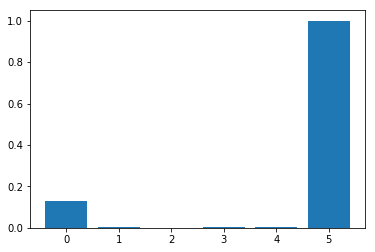

In [25]:
x = np.array([128, 1, -3, 2, 0.4, 1000]).reshape(-1,1)
x_prime = (x - x.min()) / (x.max() - x.min())
print(x_prime)
plt.bar(range(x.shape[0]), x_prime.ravel())

__Standardization__:

You can see from the chart that Min-Max Normalization is not a good normalization for gradient-based learning if the features are in very different ranges like the one above. Standardization is better: 

$$x' = \displaystyle\frac{x - \bar{x}}{\sigma(x)}$$
<br/>
Here $\bar{x}$ is the mean of x and $\sigma(x)$ is the standard deviation.


[[-0.16407088]
 [-0.51096881]
 [-0.52189473]
 [-0.50823733]
 [-0.5126077 ]
 [ 2.21777945]]


<Container object of 6 artists>

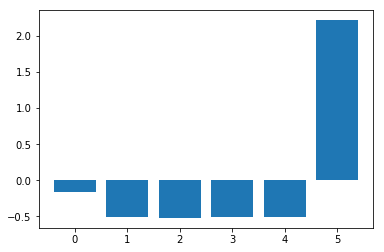

In [26]:
x = np.array([128, 1, -3, 2, 0.4, 1000]).reshape(-1,1)
x_std = (x - x.mean()) / x.std()
print(x_std)
plt.bar(range(x.shape[0]), x_std.ravel())

# 3. Using `random` package

Generating a random value or an array of random values is very important in deep learning, for example when we want to initialize the weights of our neural network, use dropout or sample the result of the output distribution. We use `numpy.random` package to generate an array of random values instead of looping through the random generation of one variable.  

Generate a matrix (2D array) of random numbers sampled from the standard normal distribution:

In [27]:
print(np.random.randn(2,4)) # You should use this for your weight initialization

[[-0.51650205  0.05601802 -0.17984873  0.7505282 ]
 [-0.0848192  -1.1942876  -0.22380902 -0.20657443]]


Generate a $2 \times 4$ matrix (2D array) of random numbers in range [0,1) sampled from the (continuous) uniform distribution:

In [28]:
print(np.random.rand(2,4))

[[ 0.11938232  0.8288025   0.57535542  0.00764013]
 [ 0.79724711  0.67976423  0.19586306  0.88521971]]


Generate a random integer number between 0 and 9 uniformly:

In [29]:
print(np.random.randint(0,10)) # note the upper limit

3


Get a permutation of a list or an array:


In [30]:
print(np.random.permutation([1, -4, 3, 2, -6]))

arr = np.arange(9).reshape((3, 3))
print(np.random.permutation(arr))

[ 3  2 -4 -6  1]
[[6 7 8]
 [0 1 2]
 [3 4 5]]


The random algorithm used for all of the methods above is a _pseudo random generating algorithm_. It is based on some initial state, or "_seed_" to generate random numbers. If you do not specify the seed, it can take some number elsewhere to be the seed. But if we specify the same seed every time we generate random numbers, those numbers will be the same. It is good for many cases, for example, replicating exactly the result of your neural network training even you randomly initialized your weights.

In [31]:
print("When we do not specify the seed:")
for i in range(3):
    print(np.random.randint(0,10))
print("When we specify the same seed:")
for i in range(3):
    np.random.seed(1111) # set the same seed 1111 before every random generation
    print(np.random.randint(0,10))
print("When we specify different seeds:")
for i in range(3):
    np.random.seed(i * 3)
    print(np.random.randint(0,10))

When we do not specify the seed:
0
5
8
When we specify the same seed:
7
7
7
When we specify different seeds:
5
8
9


## Example: Xavier Initialization and He Initialization

For a neural network to learn well, beside feature normalization and other things, we also need proper weight initialization: the weights should be randomly initialized, or at least different numbers (to break the symmetry), and they should be small. Sometimes, simply we use the factor of 0.1 to initialize our network:


In [32]:
n_in = 3 # the number of neurons from the previous layer
n_out = 2 # the number of neurons from the current layer
W = np.random.randn(n_out, n_in) * (0.1) 
print(W)

[[ 0.10049173 -0.0525626   0.076034  ]
 [ 0.2423819  -0.17956434 -0.08857829]]


However, a constant factor $\alpha = 0.1$ is not good for all layer architectures. Often, __Xavier initialization__[[Glorot and Bengio, 2010](https://arxiv.org/pdf/1207.0580.pdf)] or __He initialization__[[He et al., 2015](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf)] is better, when they take the size of the layers into account (and to be more precisely, they also consider the activation functions).

__Xavier initialization__:
    
$$\alpha = \displaystyle\sqrt{\frac{2}{n_{in} + n_{out}}}$$

It's good when use with `sigmoid` or `tanh` activation functions.

In [33]:
n_in = 3 # the number of neurons from the previous layer
n_out = 2 # the number of neurons from the current layer
W = np.random.randn(n_out, n_in) * (np.sqrt(2. / (n_in + n_out)))  # Xavier initialization
print(W)

[[-0.64820888  1.28386704  0.08342666]
 [ 1.0910627   1.16949752  0.63448025]]


__He initialization__:
    
$$\alpha = \displaystyle\sqrt{\frac{1}{n_{in}}}$$

It's good when use with `ReLU` activation function.

In [34]:
n_in = 3 # the number of neurons from the previous layer
n_out = 2 # the number of neurons from the current layer
W = np.random.randn(n_out, n_in) * (np.sqrt(1. / n_in))  # He initialization
print(W)

[[ 0.57193044 -0.13193541  0.50646769]
 [ 0.36645759  0.51891838  0.58659554]]


__Note__: The intuition behind those initialization methods comes from the fact that we try to force the distribution of the output in the current layer is close as much as possible to that of the input so that the learning is easier. Of course when doing so, we need to consider the activation function, _fan in_ (number of neurons from the previous layer), _fan out_ (number of neurons from the current layer) and even how we choose randomly number. For more intuition about those initializations, feel free to read this: http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization. And you might also want to look at the following table from https://mnsgrg.com/2017/12/21/xavier-initialization/:

<img src="../Images/initializations.png" style="width:900px;height:248px">



## Example: Sampling from Softmax Distribution

In the output layer of a multi-class classifier, we often use `softmax` and choose the output that has the maximal output probability. It is not always the case, especially with sequence modeling problems. Sometimes we would like to draw from that distribution. Let's see how to do this using the `random` package.

Assume that we have three possible outputs '$a$', '$b$', '$c$', for example, the output of an one-character handwritten recognition. The softmax layer produced the following distribution: $p$('a' $|$ input) = $0.3$, $p$('b' $|$ input) = $0.6$, $p$('c' $|$ input) = $0.1$ (note that sum of those probabilities is 1). How to sample from this distribution given the random methods we know?

The most intuitive solution is generate a random number in [0, 1), say $r$. If $r < 0.3 = p$('a' $|$ input), we generate 'a', if $ 0.3 \leq r < 0.9 = p$('a' $|$ input) $+$ $p$('b' $|$ input), we generate 'b', elsewhere ($ 0.9 \leq r < 1 = p$('a' $|$ input) $+$ $p$('b' $|$ input) $+$ $p$('c' $|$ input), we generate 'c'. 

In [35]:
def sm_sample(pa = 0.3, pb = 0.6, pc = 0.1):

    r = np.random.rand()
    if (r < pa):
        output = 'a'
    elif (r < pa + pb):
        output = 'b'
    else:
        output = 'c'
    return output

outputs = []
for i in range(10):
    outputs.append(sm_sample())
print(outputs)

outputs = []
# Law of large numbers: 100000 is large enough for our sample to approximate the true distribution
for i in range(100000):  
    outputs.append(sm_sample())

from collections import Counter
c_list = Counter(outputs)
print(c_list) 

['b', 'a', 'c', 'b', 'a', 'b', 'c', 'a', 'b', 'b']
Counter({'b': 59900, 'a': 30184, 'c': 9916})


The code above is just for illustration. If there are many possible outputs (not just 3 like in this case), we need to loop through the ifs. Fortunately, the random package has this sampling method already: `numpy.random.choice`:

In [36]:
def sm_sample_general(out, smp):
    # out contains possible outputs
    # smp contains the softmax output distributions
    return np.random.choice(out, p = smp)

out = ['a', 'b', 'c']
smp=np.array([0.3, 0.6, 0.1])

outputs = []
for i in range(10):
    outputs.append(sm_sample_general(out, smp))
print(outputs)

outputs = []
# Law of large numbers: 100000 is large enough for our sample to approximate the true distribution
for i in range(100000):  
    outputs.append(sm_sample_general(out, smp))

from collections import Counter
c_list = Counter(outputs)
print(c_list) 

['c', 'b', 'b', 'a', 'c', 'a', 'b', 'b', 'a', 'b']
Counter({'b': 60044, 'a': 29928, 'c': 10028})


# 4. Vectorization

<img src="../Images/dotparallelize.png" style="width:939px;height:289px">

`Numpy` processes arrays much more faster and effectively than their python counterparts like lists since they are greatly optimized. __Thus, we should vectorize and avoid using loops as much as possible__. Let's compare two ways of calculating dot product between two vectors:

In [37]:
# The normal for-loop
def my_dot(a, b):
    out = 0
    #assert(a.shape[0]==b.shape[0])
    for i in range(a.shape[0]):
        out += a[i] * b[i]
    return out

In [38]:
np.random.seed(1111)
n = 1000
a = np.random.randn(n)
b = np.random.randn(n)

In [39]:
%%timeit -n 100
# The for-loop one
my_dot(a,b)

100 loops, best of 3: 645 µs per loop


In [40]:
%%timeit -n 100
# The numpy one
print(np.dot(a,b))

4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027
4.8233238027

As you see, the for-loop way is much slower than the numpy one when we calculated the dot product between two 1000-dim vectors. Feel free to change n to bigger numbers, for example 5000, and you can see the gap is even bigger. 

To help you build the nature adaption from for-loop operations to vectorization, let's try to classify the algebra arithmetic operations and focus on how to vectorize them. Besides some numpy array initialization functions, there are three main types of those operations: element-wise operations between two arrays (or I could call it _pair-wise_), _element-wise application_ of a function on an array and an _aggregation_ operations on an array. 

__Pair-wise__: 
<br/>
The element-wise arithmetic operation between two same-shape arrays (also counted the broadcasted array, so be careful). This one is quite easy to vectorize: $ u + v $, $ u * v $, $ numpy.maximum(u,v)$ (element-wise get the max, different from $ numpy.max(u) $),...
<br/>
<br/>
__Element-wise application__: 
<br/>
This one is similar to the other one, just find some numpy built-in function supporting vectorization, e.g. $np.exp(u)$, $np.tanh(u)$ (but numpy does not have the built-in $sigmoid(u)$, you can use $np.exp(u)$ to do that).
<br/>
<br/>
__Aggregation function__: 
<br/>
The operations belonging to this one often follows the __pair-wise__ (e.g., in $np.dot$) and they are the most difficult ones since we have to choose the correct axis to aggregate in case the array is multi-dimensional. Another notice is that you should not wrongly take them as their similar pair-wise functions. Let's go through the following example. 




## Example: Hidden Layer Weight Update
<br/>
In the Back Propagation algorithm for an MLP with a <code>softmax</code> output layer and a <code>cross entropy error</code>, the update rule for the weights of a hidden layer is written something like this:

Calculate the error terms: $\delta_j = o_j(1-o_j) \displaystyle\sum_{k \in Downstream(j)}\delta_kw_{kj}$, then $w_{ij} = w_{ij} + \eta\delta_jx_{ji}$

__How to vectorize those two steps?__ 
<br/>
  1. The first tricky part is $\displaystyle\sum_{k \in Downstream(j)}\delta_kw_{kj}$, we know it must be a dot product between $w_{kj}$ (the next layer's weights) and $\delta_k$ (the error terms of the next layer - in _backprop_, it means we already have those error terms calculated). But what is the first argument of $np.dot()$ and what is the second argument? Doing trial and error on the compatibility of the shape? No, just assume that _you have to do the vectorization using pens and papers only_! This depends on your convention of input feature vector $\textbf{x}$: whether it is a column vector or a row vector. Just assume that your convention says $\textbf{x}$ is a column vector with the shape $(n,1)$, $n$ is the number of features. Then when you think the number of neurons in one hidden layer is also the number of higher-level features that your neural network learns up to that layers, so the activations of one layer also form a column vector, and the error terms of one layer also form a column vector. Hence, the shape of the vector $\Delta_{next}$ formed by many error terms $\delta_k$ of the next layer  is $(k,1)$, and the shape of that dot product output vector $\Delta$ formed by many error terms $\delta_j$ of the current layer is $(j,1)$, so $\Delta = \textbf{W}_{next}^T\cdot\Delta_{next}$ ($\textbf{W}_{next}$ is the first argument of $numpy.dot()$).
  2. The second tricky part is $\eta\delta_jx_{ij}$. I have seen some students use $numpy.dot()$ instead of element-wise multiplication here for $\delta_jx_{ij}$ since they think it doesn't make sense if we do element-wise multiplication between a vector and a matrix, and they tested the $numpy.dot()$ and it ran correctly in the logistic regression exercise (because it is only one output so $numpy.sum()$ of it is equal to itself!). But now we learned about broadcasting and we knew that it should be an element-wise multiplication, not the $numpy.dot()$.
<br/>

So the final vectorized version is somehow like this: $\textbf{W} = \textbf{W} + \eta * (\textbf{o}*(1-\textbf{o})*np.dot(\textbf{W}_{next}^T,\Delta_{next})) * \textbf{X}$
<br/>

Feel free to check the shape compatibility by pens and papers. Please note that $\textbf{X}$ here is not the input vector $\textbf{x}$ but it is the inputs of this current layer (which is the matrix of the activations from the previous layers).Of course, I don't recommend to include everything on one line like this, it's just served as an illustration for our vectorization.

__Vectorization of $m$ training instances (mini-batch training)__:
<br/> We learned from the practical lecture that mini-batch training is the compromising solution between batch training and online training (or stochastic gradient descent - SGD). Mini-batch training is faster than batch training and it is more stable than SGD. And the nice thing is that we can also vectorize an iteration instead of using a for-loop through every instances of that mini-batch. Assume that mini-batch size is $m$ and the number of features for each instance is $n$, we can now have the matrix of inputs $\textbf{X}$ with the shape $(n, m)$. Please remember this convention: the number of training instances is the number of columns in that matrix, and the number of row in that matrix is the number of input features. This convention is compatible with the convention we talked before as the input feature vector of one instance is a column vector!    

## Example: Dropout

In this example, we will combine what we learned on $numpy.random$ package and _vectorization_ to implement Dropout.

<img src="../Images/dropout.png" style="width:679px;height:321px">

You all know from the practical lecture that __Dropout__[[Hinton et al., 2012](https://arxiv.org/pdf/1207.0580.pdf)] is a good regularization method. During the forward phase of our training, we drop some neurons by a probability $p$ so that there is no incoming and outgoing connections from those neurons, __only for that iteration__. In this example we are going to implement the forward step of the training for one layer with its activation ReLU. The following practical way works best with the activation functions which return 0 for the inputs of 0 (for almost good activation like ReLU, tanh,..), but just leave the generalization aside for now. The direction is to create some masked vector to decide which inputs to keep, which inputs we set to 0s. 
The steps are:
  1. Initialize a random, uniform-distribute vector whose shape is the same as our layer, e.g. 100 neurons.
  2. Create the masked vector by comparing our initialized vector with the dropout probability $p$. (In convention, this is actually a keeping probability).
  3. Based on the masked vector, keep or zero-out the inputs of the layer (which are actually the outputs of the previous layer, or the input features, in case this layer is the first layer). 
  4. (Optional but helpful) Scale the inputs to compensate the dropped neurons. 
  
__Try to do it yourself first on the cell below (fill in the 5 lines of code marked__ _#CODE HERE_ __) before looking at the solution in the next cell__.

In [41]:
np.random.seed(1234)

dropout_p = 0.8                         # keep around 80% number of neurons

A_prev = np.random.randn(100, 50)       # Activations from the previous layer, mini-batch training
W = np.random.randn(30, 100)            # the previous layer has 100 neuron, 
                                        # the current layer to be dropped-out has 30 neurons
b = np.random.randn(30, 1)

# Dropout
# CODE HERE                             # Initialize a random, uniform-distribute vector with the same shape
# CODE HERE                             # Mask the drop-out: True (1) if we want to keep the corresponding neuron
                                        # False (0) if the neuron is dropped out
# CODE HERE                             # Apply the mask
# CODE HERE                             # Scale the activation after dropping a number of neurons

# Do the forward pass
A = np.tanh(np.dot(W, A_prev) + b)

print(A[3:6, 2:4])


[[ 1.         -0.1424056 ]
 [-0.99921594  0.99999822]
 [ 0.99999907  0.99999793]]


__If you implement correctly, the output should be:__
<br/>
[[ 1.&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;-0.99841418]<br/>
 [-0.89187979&emsp;0.99999996]<br/>
 [ 1.&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;0.99999776]]

In [42]:
np.random.seed(1234)

dropout_p = 0.8                         # keep around 80% number of neurons

A_prev = np.random.randn(100, 50)       # Activations from the previous layer, mini-batch training
W = np.random.randn(30, 100)            # the previous layer has 100 neuron, 
                                        # the current layer to be dropped-out has 30 neurons
b = np.random.randn(30, 1)

# Dropout
dropped = np.random.rand(100, 50)       # Initialize a random, uniform-distribute vector with the same shape
masked = (dropped < dropout_p)          # Mask the drop-out: True (1) if we want to keep the corresponding neuron
                                        # False (0) if the neuron is dropped out
A_prev = A_prev * masked                # Apply the mask
A_prev = A_prev / dropout_p             # Scale the activation after dropping a number of neurons

# Do the forward pass
A = np.tanh(np.dot(W, A_prev) + b)

print(A[3:6, 2:4])


[[ 1.         -0.99841418]
 [-0.89187979  0.99999996]
 [ 1.          0.99999776]]
